In [1]:
from ultralytics import YOLO, settings
import os
import matplotlib.pyplot as plt

# Обучение НС - YOLOv5,v8,v9

In [ ]:
architectures = ['yolov5nu.pt', 'yolov8n.pt', 'yolov9t.pt']
metrics_all = {}

for arch in architectures:

    data_file = f'coco128.yaml'
    model = YOLO(arch)
    results = model.train(data=data_file, epochs=10, imgsz=640, save=False)
    mAP50 = results.box.ap50
    metrics_all[arch] = {
        'mAP50': mAP50
    }
    print(f'Резульатыт: {results.box}')

# Отображение графика точности на эпохах обучения

yolov5nu [0.04939, 0.10128, 0.1613, 0.27678, 0.34964, 0.40443, 0.41726, 0.45321, 0.46849, 0.48376]
yolov8n [0.00511, 0.00922, 0.03707, 0.03896, 0.05854, 0.11645, 0.17081, 0.24482, 0.33687, 0.40468]
yolov9t [0.00154, 0.0039, 0.00933, 0.01907, 0.15443, 0.19033, 0.19359, 0.25676, 0.32565, 0.36525]


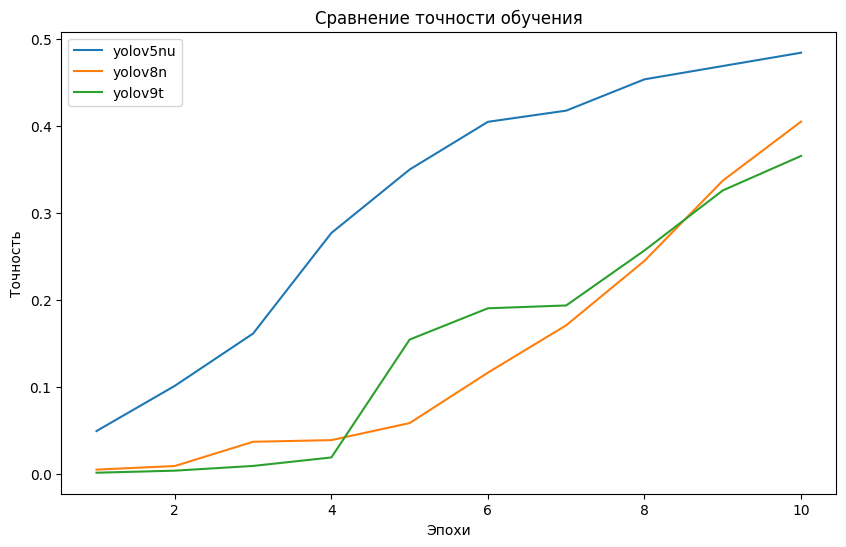

In [6]:
import pandas

metrics = {}
yolov5_map50 = pandas.read_csv('runs/detect/yolov5/results.csv', usecols=['metrics/mAP50(B)'])
yolov8_map50 = pandas.read_csv('runs/detect/yolov9/results.csv', usecols=['metrics/mAP50(B)'])
yolov9_map50 = pandas.read_csv('runs/detect/yolov8/results.csv', usecols=['metrics/mAP50(B)'])
metrics['yolov5nu'] = yolov5_map50['metrics/mAP50(B)'].tolist()
metrics['yolov8n'] = yolov8_map50['metrics/mAP50(B)'].tolist()
metrics['yolov9t'] = yolov9_map50['metrics/mAP50(B)'].tolist()
plt.figure(figsize=(10, 6))
for arch, map50 in metrics.items():
    print(arch, map50)
    plt.plot([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], map50, label=arch)

plt.xlabel("Эпохи")
plt.ylabel("Точность")
plt.title("Сравнение точности обучения")
plt.legend()
plt.show()

# Предикт каждой модели

In [7]:
CURRENT_DIR = os.getcwd()
yolov5_dir = os.path.join(CURRENT_DIR, 'runs\detect\\yolov5\weights\\best.pt')
yolov8_dir = os.path.join(CURRENT_DIR, 'runs\detect\\yolov9\weights\\best.pt')
yolov9_dir = os.path.join(CURRENT_DIR, 'runs\detect\\yolov8\weights\\best.pt')
yolov5 = YOLO(yolov5_dir)
yolov8 = YOLO(yolov8_dir)
yolov9 = YOLO(yolov9_dir)
for model in [yolov5, yolov8, yolov9]:
    results = model.predict(source=CURRENT_DIR + '/test_images')

    for result in results:
        result.show()
        for box in result.boxes:
            xmin, ymin, xmax, ymax = box.xyxy[0]
            print(f"""Класс: {model.names[int(box.cls)]}
    Координаты рамки
    Левая сторона: {xmin:.2f}
    Правая сторона: {xmax:.2f}
    Верхняя сторона: {ymin:.2f}
    Нижняя сторона : {ymax:.2f}
    Уверенность: {float(box.conf):.2f}""")


image 1/3 C:\Users\Extaz\PycharmProjects\NVSU_labs\YOLO_nn\test_images\9_OpNQDDZ64.jpg: 640x384 1 , 47.0ms
image 2/3 C:\Users\Extaz\PycharmProjects\NVSU_labs\YOLO_nn\test_images\test.png: 640x640 (no detections), 78.0ms
image 3/3 C:\Users\Extaz\PycharmProjects\NVSU_labs\YOLO_nn\test_images\test2.jpg: 480x640 (no detections), 53.3ms
Speed: 3.0ms preprocess, 59.4ms inference, 0.3ms postprocess per image at shape (1, 3, 480, 640)
Класс: человек
    Координаты рамки
    Левая сторона: 61.57
    Правая сторона: 398.67
    Верхняя сторона: 1242.22
    Нижняя сторона : 2160.00
    Уверенность: 0.74

image 1/3 C:\Users\Extaz\PycharmProjects\NVSU_labs\YOLO_nn\test_images\9_OpNQDDZ64.jpg: 640x384 (no detections), 100.3ms
image 2/3 C:\Users\Extaz\PycharmProjects\NVSU_labs\YOLO_nn\test_images\test.png: 640x640 (no detections), 141.8ms
image 3/3 C:\Users\Extaz\PycharmProjects\NVSU_labs\YOLO_nn\test_images\test2.jpg: 480x640 (no detections), 332.9ms
Speed: 5.4ms preprocess, 191.6ms inference, 0.7ms